#### Algorithm that perform better in testing share are
> GradientBoosting

> Failed=0  
 Success=1

In [1]:
import pandas as pd
# pd.set_option('max_columns', 37)
%matplotlib inline

In [2]:
dd = pd.read_csv('0.Data/kickstarter_data_full.csv',low_memory=False)

In [3]:
def drop_columns_further(df):
    date_info=['deadline_month','deadline_day','created_at_month','created_at_day','created_at_hr',
               'launched_at_month','launched_at_day','launched_at_hr','name_len','blurb_len']
    return df.drop(date_info,axis=1)
def drop_useless_columns(df):
    look_useless=['is_starred','is_backing','permissions','pledged','currency','disable_communication','spotlight']
    redundant=['launch_to_state_change','deadline','SuccessfulBool','launch_to_state_change_days']
    state_change_date=['state_changed_at_weekday','state_changed_at_month','state_changed_at_day','state_changed_at_yr'
                      ,'state_changed_at_hr']
    too_much_info=['create_to_launch','launch_to_deadline','launch_to_state_change','location']
    too_much_info1=['state_changed_at','created_at','launched_at']
    too_much_info2=['state_changed_at','created_at','launched_at']
    for_later=['created_at_yr','launched_at_yr','deadline_yr','deadline_hr','launch_to_deadline']
    words=['name','blurb','slug','urls','profile']
    list_to_drop=['USorGB','Unnamed: 0','id','photo','currency_symbol','currency_trailing_code','static_usd_rate','creator','source_url','friends','TOPCOUNTRY']
    drop_list=look_useless+words+list_to_drop+redundant+for_later+too_much_info+too_much_info1+too_much_info2 + state_change_date
    return drop_columns_further(df.drop(drop_list,axis=1))

In [4]:
df1=drop_useless_columns(dd)

### Lets drop row that has nan values and also just keep failed and succesful state values

In [5]:
def drop_nan_and_keep_only_success_failure(data):
    mask = (data['state']=='failed') | (data['state']=='successful')
    return data[mask]

In [6]:
df=drop_nan_and_keep_only_success_failure(df1)

In [7]:
df.head()

,goal,state,country,staff_pick,backers_count,usd_pledged,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,DeadlineWeekend
0,1500.0,failed,US,False,0,0.000000,Academic,9.0,16.0,Friday,Saturday,Wednesday,17,36,0,0
1,500.0,failed,US,False,0,0.000000,Academic,4.0,15.0,Friday,Friday,Monday,10,60,0,0
2,100000.0,failed,US,False,5,120.000000,Academic,8.0,10.0,Thursday,Saturday,Sunday,1,60,0,0
3,5000.0,failed,US,False,0,0.000000,Academic,6.0,13.0,Monday,Friday,Saturday,0,30,0,0
4,3222.0,failed,DE,False,17,396.802395,Academic,7.0,18.0,Monday,Wednesday,Thursday,0,32,0,0


In [8]:
scale_mapper = {"failed":0, "successful":1}
df["state"]=df["state"].replace(scale_mapper)

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
df=df.dropna(axis=0, how='any')

In [ ]:
# def divide(x,y):
#     return x/y
# #df['pledged_to_goal']=df[['usd_pledged','goal']].apply(divide)
# #df['pledged_to_goal']=df.apply(lambda row:lst[row['J1']:row['J2']],axis=1)
# df['pledged_to_goal'] = df[['usd_pledged','goal']].apply(lambda x: divide(*x), axis=1)

In [10]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X=df[['goal']]
X = sc.fit_transform(X)
# import numpy as np
# from sklearn.preprocessing import FunctionTransformer
# sc = FunctionTransformer(np.log1p)
# X=df['goal']
# X= sc.transform(df[['goal']])

In [11]:
df.head()

,goal,state,country,staff_pick,backers_count,usd_pledged,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,DeadlineWeekend
0,1500.0,0,US,False,0,0.000000,Academic,9.0,16.0,Friday,Saturday,Wednesday,17,36,0,0
1,500.0,0,US,False,0,0.000000,Academic,4.0,15.0,Friday,Friday,Monday,10,60,0,0
2,100000.0,0,US,False,5,120.000000,Academic,8.0,10.0,Thursday,Saturday,Sunday,1,60,0,0
3,5000.0,0,US,False,0,0.000000,Academic,6.0,13.0,Monday,Friday,Saturday,0,30,0,0
4,3222.0,0,DE,False,17,396.802395,Academic,7.0,18.0,Monday,Wednesday,Thursday,0,32,0,0


In [12]:
df[['goal']]=X

In [ ]:
# sc = FunctionTransformer(np.log1p)
# X=df['usd_pledged']
# X= sc.transform(df[['usd_pledged']])

In [ ]:
#df[['usd_pledged']]=X

In [13]:
df["staff_pick"]=df["staff_pick"].astype(int)

In [14]:
df.staff_pick.unique()

array([0, 1])

In [15]:
df.head()

,goal,state,country,staff_pick,backers_count,usd_pledged,category,name_len_clean,blurb_len_clean,deadline_weekday,created_at_weekday,launched_at_weekday,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,DeadlineWeekend
0,-0.287671,0,US,0,0,0.000000,Academic,9.0,16.0,Friday,Saturday,Wednesday,17,36,0,0
1,-0.315068,0,US,0,0,0.000000,Academic,4.0,15.0,Friday,Friday,Monday,10,60,0,0
2,2.410959,0,US,0,5,120.000000,Academic,8.0,10.0,Thursday,Saturday,Sunday,1,60,0,0
3,-0.191781,0,US,0,0,0.000000,Academic,6.0,13.0,Monday,Friday,Saturday,0,30,0,0
4,-0.240493,0,DE,0,17,396.802395,Academic,7.0,18.0,Monday,Wednesday,Thursday,0,32,0,0


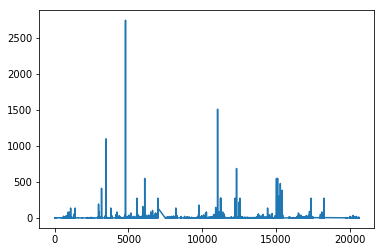

In [16]:
%matplotlib inline
df.goal.plot()

> Dummpy variable created.

In [ ]:
df.dtypes

In [17]:
df = pd.get_dummies(df, columns=['country'])
df = pd.get_dummies(df, columns=['category'])
df = pd.get_dummies(df, columns=['deadline_weekday'])
df = pd.get_dummies(df, columns=['created_at_weekday'])
df = pd.get_dummies(df, columns=['launched_at_weekday'])
df.shape

(15787, 76)

In [18]:
df.head()

,goal,state,staff_pick,backers_count,usd_pledged,name_len_clean,blurb_len_clean,create_to_launch_days,launch_to_deadline_days,LaunchedTuesday,...,created_at_weekday_Thursday,created_at_weekday_Tuesday,created_at_weekday_Wednesday,launched_at_weekday_Friday,launched_at_weekday_Monday,launched_at_weekday_Saturday,launched_at_weekday_Sunday,launched_at_weekday_Thursday,launched_at_weekday_Tuesday,launched_at_weekday_Wednesday
0,-0.287671,0,0,0,0.000000,9.0,16.0,17,36,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.315068,0,0,0,0.000000,4.0,15.0,10,60,0,...,0,0,0,0,1,0,0,0,0,0
2,2.410959,0,0,5,120.000000,8.0,10.0,1,60,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.191781,0,0,0,0.000000,6.0,13.0,0,30,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.240493,0,0,17,396.802395,7.0,18.0,0,32,0,...,0,0,1,0,0,0,0,1,0,0


-----

In [19]:
from sklearn.model_selection import train_test_split
y = df.state
X=df.drop(['state','usd_pledged'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.state)

---

In [20]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from confusion_matrix import plot_confusion_matrix, show_confusion_matrix
from confusion_matrix import plot_roc_curve

---

In [21]:
# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state = 0)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

classifier score 0.9259024699176694
Confusion Matrix
[[1993  121]
 [ 113  931]]


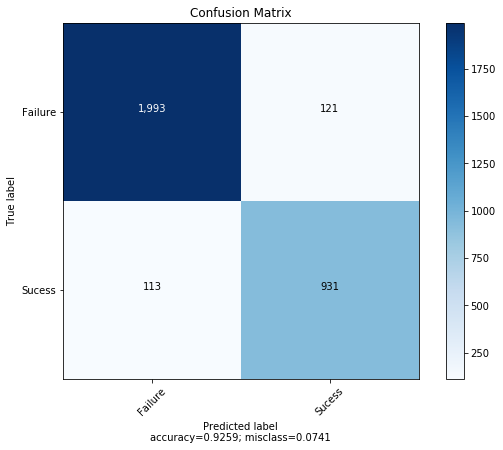

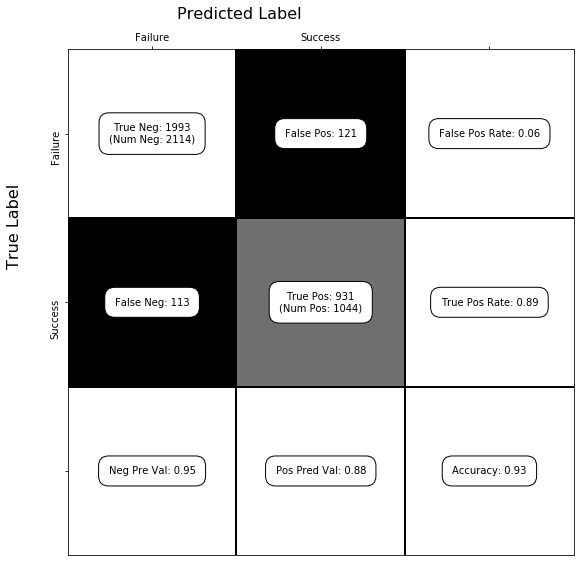

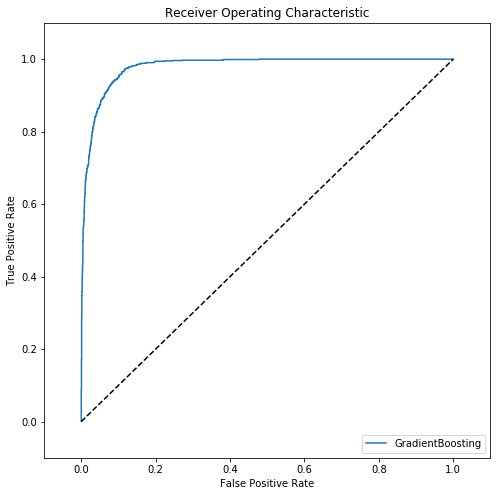

Area under ROC curve 0.9793064481634931


In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'GradientBoosting')
print ('Area under ROC curve',auc(fpr, tpr))

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Plot feature importance
feature_importance = classifier.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print(sorted_idx)
X_train.columns[sorted_idx]
#plt.subplot(1, 2, 2)
#plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.columns[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

[36 33 28 39 40 44 48 22 21 52 54 55 17 30 58 59 68 67 65 64 63 14 62  8
  9 10 61 60 32 56  7 26 73 66 69 29 16 57 72 53 49 71 20 42 11 50 70 51
 15  1 12 45 24 34 27 19 25 13 47 18  3 35  4  6 31  5 38 43 41 46 23 37
  0  2]


Index(['category_Flight', 'category_Comedy', 'country_SG',
       'category_Immersive', 'category_Makerspaces', 'category_Robots',
       'category_Spaces', 'country_LU', 'country_IT', 'category_Webseries',
       'deadline_weekday_Monday', 'deadline_weekday_Saturday', 'country_FR',
       'category_Academic', 'deadline_weekday_Tuesday',
       'deadline_weekday_Wednesday', 'launched_at_weekday_Monday',
       'launched_at_weekday_Friday', 'created_at_weekday_Tuesday',
       'created_at_weekday_Thursday', 'created_at_weekday_Sunday',
       'country_DE', 'created_at_weekday_Saturday', 'DeadlineWeekend',
       'country_AT', 'country_AU', 'created_at_weekday_Monday',
       'created_at_weekday_Friday', 'category_Blues',
       'deadline_weekday_Sunday', 'LaunchedTuesday', 'country_NZ',
       'launched_at_weekday_Wednesday', 'created_at_weekday_Wednesday',
       'launched_at_weekday_Saturday', 'country_US', 'country_ES',
       'deadline_weekday_Thursday', 'launched_at_weekday_Tuesday

----

Lets save the model for later use

In [24]:
# Import Logistic regression libraries
from sklearn.linear_model import LogisticRegression
#logistic = LogisticRegression()
logistic = LogisticRegression(penalty='l2')
logistic_model=logistic.fit(X_train, y_train)

classifier score 0.9259024699176694
Confusion Matrix
[[1993  121]
 [ 113  931]]


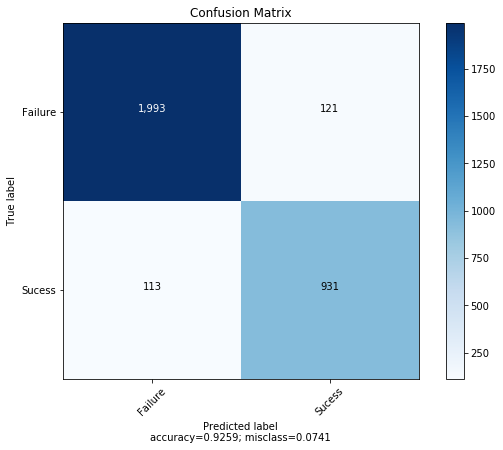

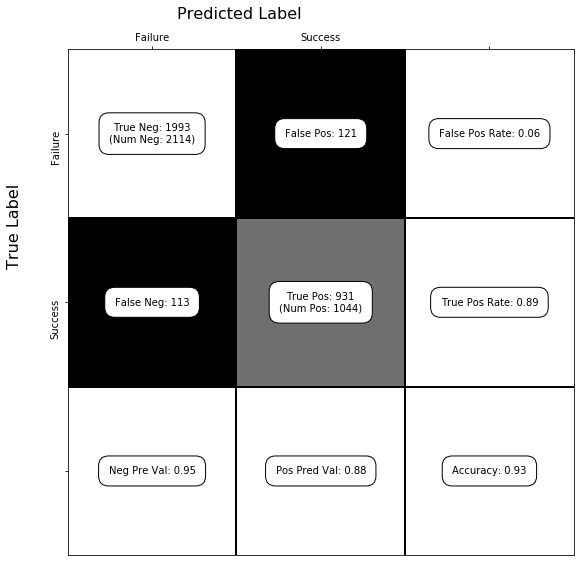

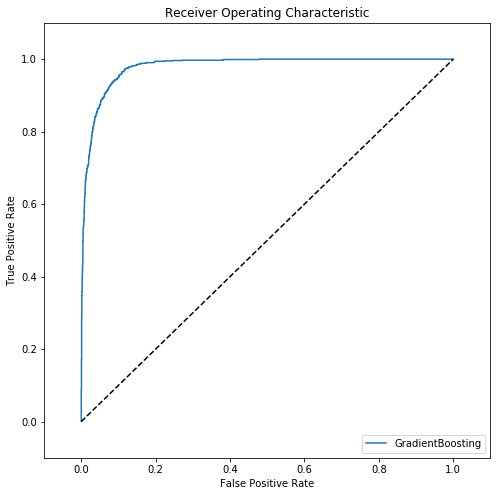

Area under ROC curve 0.9793064481634931


In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'GradientBoosting')
print ('Area under ROC curve',auc(fpr, tpr))

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

classifier score 0.8847371754274858
Confusion Matrix
[[1944  170]
 [ 194  850]]


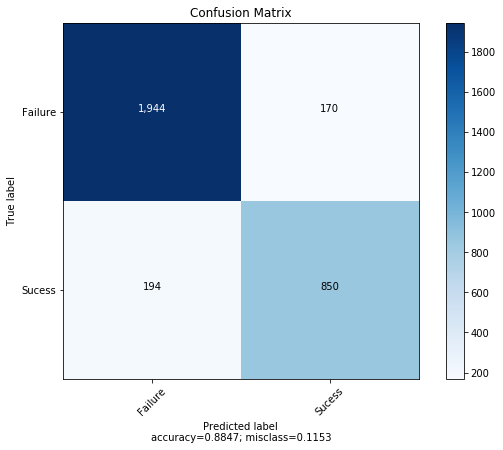

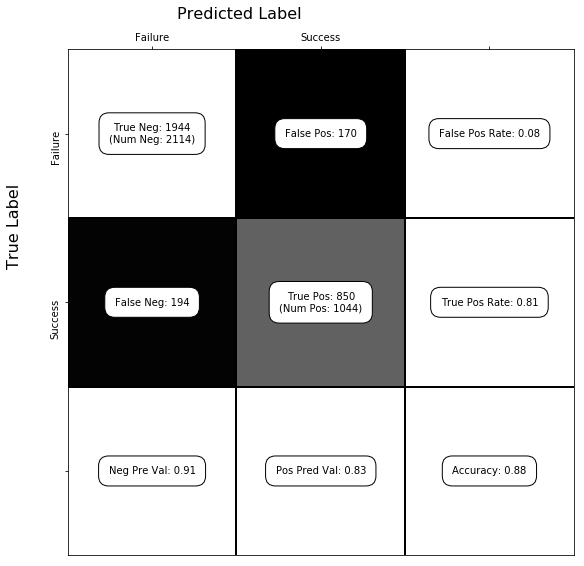

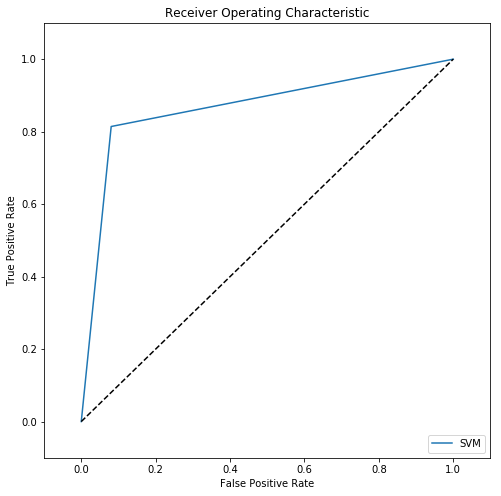

Area under ROC curve 0.8668799863707376


In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('classifier score',classifier.score(X_test, y_test))
# Display confusion matrix for y_test and pred
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
# Predict PROBABILITIES using regularized KNN
pred_prob = classifier.predict_proba(X_test)
# Get just the prediction for the positive class (1)
pred= [p[1] for p in pred_prob]
fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Failure', 'Sucess'],
                      title        = "Confusion Matrix")
show_confusion_matrix(cm, ['Failure', 'Success'])
plot_roc_curve(fpr, tpr,'SVM')
print ('Area under ROC curve',auc(fpr, tpr))

In [28]:
# Load libraries
import pydotplus
from IPython.display import Image
from sklearn import tree

In [29]:
dot_data = tree.export_graphviz(classifier , out_file=None, 
                                feature_names=X_train.columns)

In [30]:
graph = pydotplus.graph_from_dot_data(dot_data) 

In [31]:
# Create PNG
graph.write_png("kickstart1.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.960036 to fit



True

In [36]:
print ("Successful campaigns % staff picks")
print (len(dd[dd['staff_pick'] == 1])/(float(len(dd))*100))
print ('number of staff pick',len(dd[dd['staff_pick'] == 1]))
print ('number of entries',len(dd))

Successful campaigns % staff picks
0.0010590345094998062
number of staff pick 2185
number of entries 20632


In [37]:
corrdf =dd.corr()
corrdf['SuccessfulBool'].sort_values()

launch_to_deadline_days       -0.112968
Unnamed: 0                    -0.099563
deadline_yr                   -0.086247
state_changed_at_yr           -0.082565
launched_at_yr                -0.080460
created_at_yr                 -0.078833
disable_communication         -0.068135
launched_at_hr                -0.054318
goal                          -0.035045
DeadlineWeekend               -0.030578
id                            -0.015477
deadline_day                  -0.011189
created_at_month              -0.008615
state_changed_at_day          -0.008285
launched_at_day               -0.008251
deadline_hr                   -0.001228
created_at_day                -0.000470
currency_trailing_code         0.005023
state_changed_at_hr            0.005708
created_at_hr                  0.008278
launched_at_month              0.010042
create_to_launch_days          0.012799
blurb_len                      0.021875
deadline_month                 0.025649
state_changed_at_month         0.029588
